In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/equipment-data/Equipment Anamoly data.csv


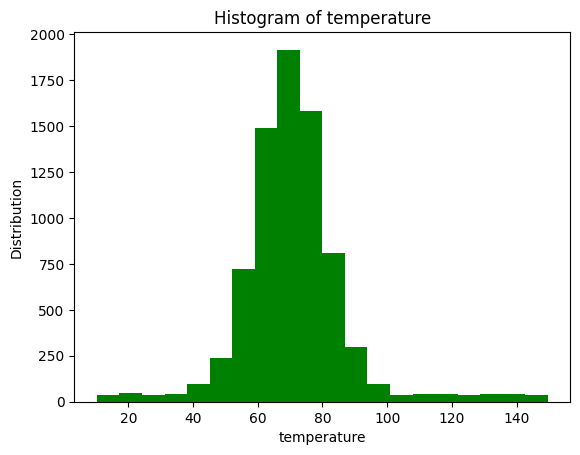

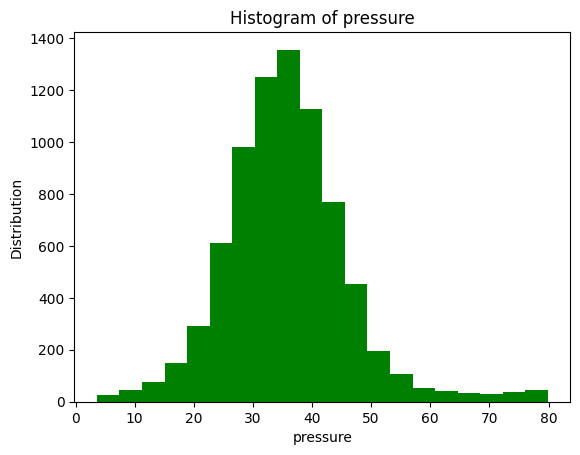

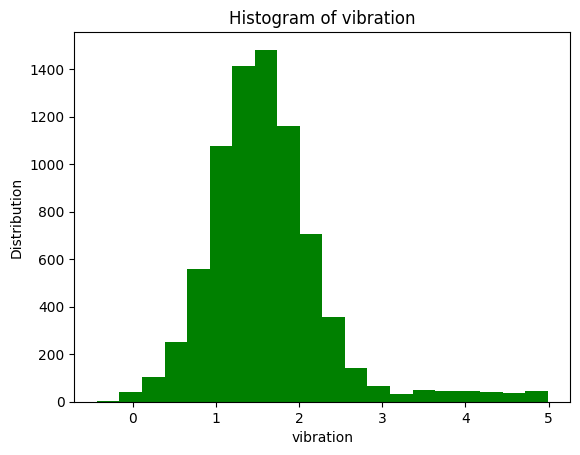

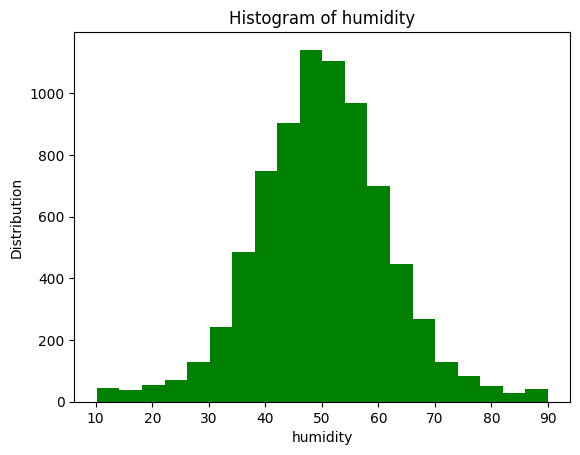

In [2]:
data = pd.read_csv("/kaggle/input/equipment-data/Equipment Anamoly data.csv")
#Check the data
data.head()

features = ["temperature","pressure","vibration","humidity"]
#Checking if the features are guassian
for feature in features:
    plt.hist(data[feature], bins = 20, color = 'g')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Distribution")
    plt.show()

#Note: The text value features are opted you can include them by encoding wana try?

[Checking the Data](http://)

In [3]:
print(f"The shape of data {data.shape}")
ndata = data.to_numpy()
y_label = ndata[:,6]
print(f"Checking the size of our target label {y_label.shape} and few sample are {y_label[:5]}")

#Now taking our input just nuerical data
features_data = ndata[:,:4]
print(f"Our features data shape is{features_data.shape}, and few samples are {features_data[:5]}")

The shape of data (7672, 7)
Checking the size of our target label (7672,) and few sample are [0 0 0 0 0]
Our features data shape is(7672, 4), and few samples are [[58.18018004 25.02927765 0.606516217 45.6949071]
 [75.74071221 22.9540176 2.338094754 41.86740679]
 [71.35859424 27.27683032 1.389198305 58.95440891]
 [71.61698527 32.2429213 1.770689686 40.56513821]
 [66.50683204 45.1974708 0.345397989 43.25379476]]


In [4]:
#Manually Taking 20% in Cross_Validation and other to training
X_train = features_data[:6100,:]
print(f"Training Data Shape{X_train.shape}")
X_val = features_data[:(7672-6100),:]
print(f"Training Data Shape{X_val.shape}")

Training Data Shape(6100, 4)
Training Data Shape(1572, 4)


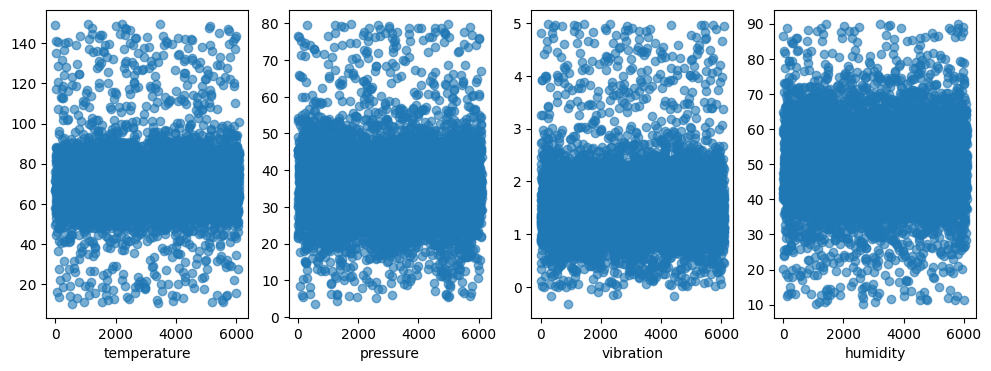

In [5]:
#Visualize a Bit more
index  = np.arange(len(X_train))
fig , axs = plt.subplots(1,4,figsize = (12,4))
for i in range(len(axs)):
    axs[i].scatter(index,X_train[:,i], alpha = 0.6)
    axs[i].set_xlabel(features[i])
axs[0].set_label("Distribution")
plt.show()

In [6]:
#Estimate Guassian
def estimate_guassian(X):
    means = np.mean(X, axis=0)
    varis = np.var(X, axis=0)
    return means,varis

In [7]:
mean, var = estimate_guassian(X_train)
mu = np.array(mean,dtype = "float")
var = np.array(var,dtype = "float")
print(f"Mean is {mean}, Variance is: {var}")

Mean is [71.0961531286132 35.85545047947126 1.6109781200583526 49.89493838180824], Variance is: [262.32218214 108.6784141    0.52800927 140.59073692]


In [8]:
def multivariate_gaussian(X, mu, var):
    k = len(mu)
    
    # If variance is 1D (diagonal covariance)
    if var.ndim == 1:
        var = np.diag(var)
    
    # Shift X by the mean
    X = X - mu
    
    # Compute inverse and determinant of covariance
    inv_var = np.linalg.pinv(var)   # Pseudo-inverse
    det_var = np.linalg.det(var)
    
    # Mahalanobis distance
    mahal = np.sum((X @ inv_var) * X, axis=1)
    
    # Probability density
    p = ((2 * np.pi) ** (-k / 2)) * (det_var ** -0.5) * np.exp(-0.5 * mahal)
    
    return p

In [9]:
prob = multivariate_gaussian(X_train,mean,var)
p_val = prob[:(7672-6100)]
y_val = y_label[:6100]

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [ ]:
def select_threshold(y_val, p_val): 
    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    step_size = (max(p_val) - min(p_val)) / 1000
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):
    
        predictions = p_val < epsilon
        tp = np.sum((predictions == 1) & (y_val == 1))
        fp = np.sum((predictions == 1) & (y_val == 0))
        fn = np.sum((predictions == 0) & (y_val == 1))
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        F1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        ### END CODE HERE ### 
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1

In [ ]:
p_val = multivariate_gaussian(X_val, mu, var)
epsilon, F1 = select_threshold(y_val, p_val)

In [ ]:
def predict_anomalies(X_new, mu, var, epsilon):
    p = multivariate_gaussian(X_new, mu, var)
    preds = (p < epsilon)  # Boolean array
    
    for i, prob in enumerate(p):
        status = "Anomalous " if preds[i] else "Normal "
        print(f"Data point {i+1}: Probability = {prob:.6f} --> {status}")
    
    return preds, p


In [ ]:
X_test = np.random.rand(4,4)
mu = np.mean(X_test, axis = 0)
var = np.var(X_test, axis =0)

predict = predict_anomalies(X_test,mu,var,epsilon)
predict